In [1]:
from efield.efield4 import *
from utils.frequency_sweep import *
from utils.efield_1_sweep import *
from src.scattering_algorithm.scattering_from_E_field_antenna import Scattering_E_field_from_antenna, plot_PowerConjMatch

In [ ]:
filename_mesh = 'data/antennas_mesh/slot_antenna01.mat'

In [ ]:
StartFreq   = 12.5e6
StopFreq    = 6250e6
NumberOfSteps = 500
step=(StopFreq - StartFreq) / (NumberOfSteps - 1)
print(f"StartFreq: {StartFreq}, StopFreq: {StopFreq}, step: {step}")

In [ ]:
frequencies = generate_freq_step(StartFreq, StopFreq, step=step)

feed_point = np.array([0, 0, 0])

result_freq_sweep = frequency_sweep(filename_mesh, frequencies, feed_point)

In [ ]:
frequencies, impedances, s11_db, currents, *_ = load_freq_sweep_data(result_freq_sweep)
# plot_smith_chart(impedances, frequencies)
plot_impedance_curve(impedances, StartFreq, StopFreq)
plot_s11_curve(s11_db, StartFreq, StopFreq)

In [ ]:
mesh2_filename = 'data/antennas_mesh2/slot_antenna01_mesh2.mat'
observation_point = np.array([0, 0, 1])

e_fields, h_fields = efield_1_sweep(mesh2_filename, frequencies, currents, observation_point)
plot_efield_components(frequencies, e_fields)
plot_ey_phase(frequencies, e_fields)

In [ ]:
radiatedfield_1_sweep_filename = 'data/antennas_sweep/slot_antenna01_radiatedfield_1_sweep.mat'

Scattering_E_field_from_antenna(filename_mesh, radiatedfield_1_sweep_filename, impedances, feed_point)

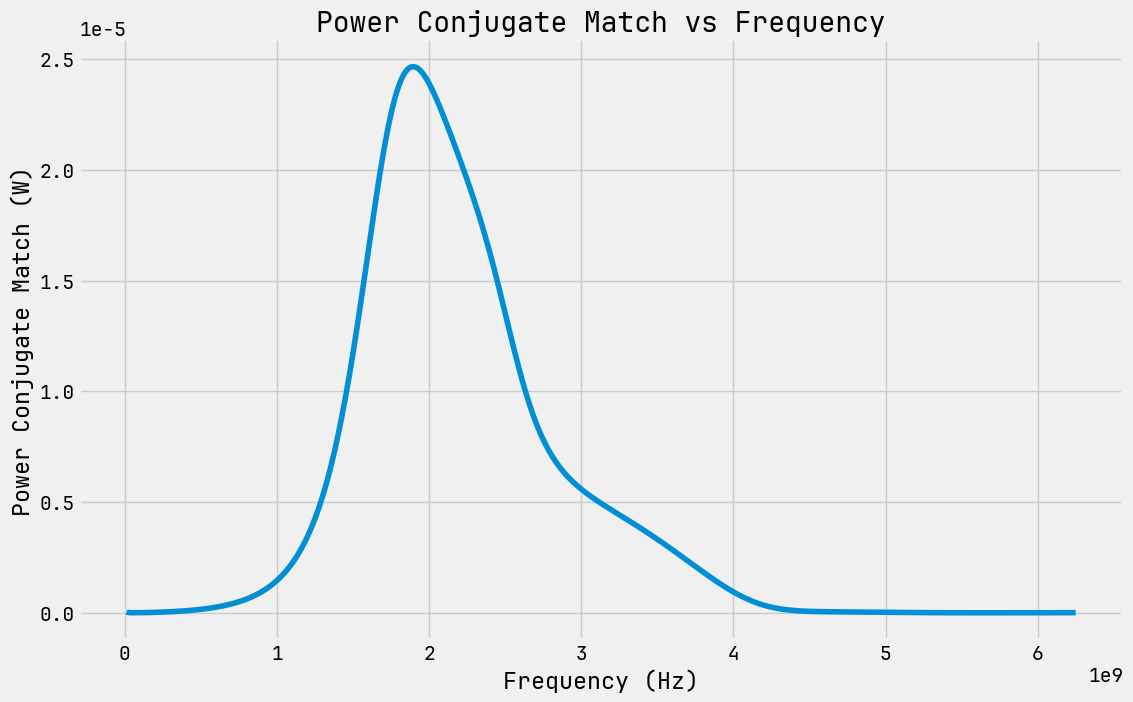

In [2]:
Scattering_E_field_from_antenna_filename = 'data/antennas_sweep/slot_antenna01_scattering_from_slot_antenna01_sweep'
plot_PowerConjMatch(Scattering_E_field_from_antenna_filename)